### Student Information
Name:黃曼琳

Student ID:108065507

GitHub ID:elainehml

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
len(twenty_train.filenames)

2257

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [6]:
##Exercise 2#################################################

#Answer here

X.query('category==2')[0:20]["text"]

7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...
28    From: rind@enterprise.bih.harvard.edu (David R...
29    From: spp@zabriskie.berkeley.edu (Steve Pope) ...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
32    From: doyle+@pitt.edu (Howard R Doyle) Subject...
34    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
44    From: rgasch@nl.oracle.com (Robert Gasch) Subj...
49    From: jimj@contractor.EBay.Sun.COM (Jim Jones)...
51    From: noring@netcom.com (Jon Noring) Subject: ...
54    From: ls8139@albnyvms.bitnet (larry silverberg...
56    From: kaminski@netcom.com (Peter Kaminski) Sub...
63    From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...
66    From: paj@uk.co.gec-mrc (Paul Johnson) Subject...
71    From: Daniel.Prince@f129.n102.z1.calcom.socal....
77    From: dmp1@ukc.ac.uk (D.M.Procida) Subject

In [7]:
X[X.category==2][0:20]["text"]

7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...
28    From: rind@enterprise.bih.harvard.edu (David R...
29    From: spp@zabriskie.berkeley.edu (Steve Pope) ...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
32    From: doyle+@pitt.edu (Howard R Doyle) Subject...
34    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
44    From: rgasch@nl.oracle.com (Robert Gasch) Subj...
49    From: jimj@contractor.EBay.Sun.COM (Jim Jones)...
51    From: noring@netcom.com (Jon Noring) Subject: ...
54    From: ls8139@albnyvms.bitnet (larry silverberg...
56    From: kaminski@netcom.com (Peter Kaminski) Sub...
63    From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...
66    From: paj@uk.co.gec-mrc (Paul Johnson) Subject...
71    From: Daniel.Prince@f129.n102.z1.calcom.socal....
77    From: dmp1@ukc.ac.uk (D.M.Procida) Subject

In [8]:
##Exercise 2 end#################################################

In [9]:
##Exercise 5#################################################

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

In [10]:
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

In [11]:
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [13]:
#Answer here

#There are couples different presentative way of the missing value in the matrix above. 
#It seems that the is.Null() function can only work on the real missing value for complier.
#For the B,C and F cases which function didn't work, there are actually some value that can be read by computer, 
#yet, we human by knowing the meaning of the data we will define them as null data. 
#What is.Null() function will determine as null cells are filled with NaN and None generated by code like 
#case A and E, and cells are really empty like case B.

In [14]:
##Exercise 5 end#################################################

In [15]:
X_sample = X.sample(n=1000) #random state

In [16]:
len(X_sample)

1000

In [17]:
##Exercise 6#################################################

#Answer here

#the number of data in the dataframe, the data is sort in a random order


In [18]:
##Exercise 6 end#################################################

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

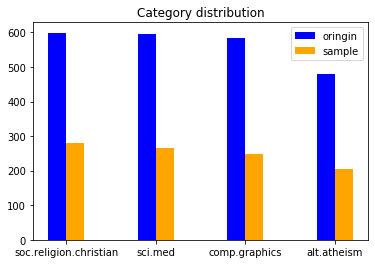

In [21]:
##Exercise 8#################################################

# Answer here

import numpy as np
upper_bound = max(X.category_name.value_counts()) + 10

ypos=np.arange(len(X.category_name.value_counts()))

plt.bar(ypos-0.1,X.category_name.value_counts(),width=0.2, label='oringin', color='blue')
plt.bar(ypos+0.1,X_sample.category_name.value_counts(),width=0.2, label='sample', color='orange')

plt.title('Category distribution')
plt.xticks(ypos,X.category_name.value_counts().index)
plt.legend()

plt.show()

In [22]:
##Exercise 8 end#################################################

In [23]:
import nltk

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [25]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [26]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [27]:
##Exercise 10#################################################

# Answer here

arr=X_counts[0:5,0:100].toarray()
a=np.argwhere(arr==1)
n=a[1,1]

In [28]:
##Exercise 10 end#################################################

In [29]:
count_vect.get_feature_names()[n]

'01'

In [30]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [31]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [32]:
import seaborn as sns

In [33]:
##Exercise 11#################################################

# Answer here

from collections import Counter
import operator
n=X_counts.shape
arr1=X_counts.toarray()
a=np.argwhere(arr1>1)

In [34]:
terms=[]
counts={}
for doc, term in a:
    terms.append(term)

print(len(terms))

def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

frequentterm=Remove(terms)
print(len(frequentterm))

for n in frequentterm:
    counts[n]=terms.count(n)

termsum=sum(counts.values())

107463
12806


[32142, 32493, 23610, 17556, 4992, 18474, 32139, 18551, 12626, 14601, 14887, 35638, 32270, 23250, 6298, 5410, 16254, 23733, 5549, 35157]
['term_the', 'term_to', 'term_of', 'term_in', 'term_and', 'term_is', 'term_that', 'term_it', 'term_edu', 'term_for', 'term_from', 'term_you', 'term_this', 'term_not', 'term_be', 'term_are', 'term_have', 'term_on', 'term_as', 'term_with']
107463
['doc_858', 'doc_255', 'doc_1746', 'doc_798', 'doc_655', 'doc_583', 'doc_505', 'doc_954', 'doc_1435', 'doc_227', 'doc_135', 'doc_473', 'doc_480', 'doc_1897', 'doc_1836', 'doc_947', 'doc_108', 'doc_455', 'doc_432', 'doc_1860']
105


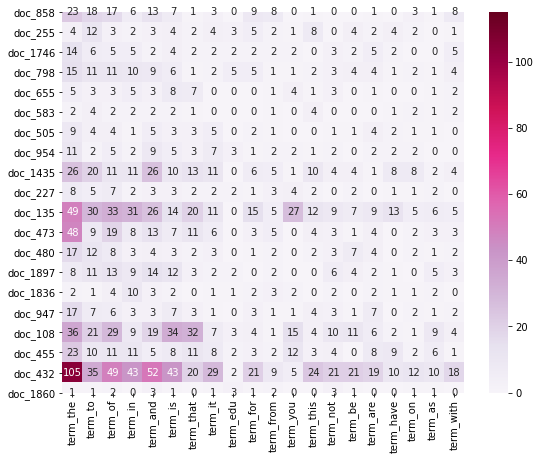

In [35]:
def sort_by_value(d): 
    items=d.items() 
    backitems=[[v[1],v[0]] for v in items] 
    backitems.sort(reverse=True) 
    return [ backitems[i][1] for i in range(0,len(backitems))] 
countsort=sort_by_value(counts)

print(countsort[0:20])

featurename=[]
for n in countsort[0:20]:
    featurename.append(count_vect.get_feature_names()[n])
    
plot_x1 = ["term_"+str(i) for i in featurename]
print(plot_x1)

import random
docs=[]
for doc, term in a:
    docs.append(doc)
print(len(docs))

sampledoc=random.sample(docs,20)

plot_y1 = ["doc_"+ str(i) for i in sampledoc]
print(plot_y1)

plot_z1t=[]
for n in sampledoc:
    for m in countsort[0:20]:
        plot_z1t.append(X_counts[n,m])

plot_z1=np.array(plot_z1t).reshape(20,20)

df_todraw = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(9,7))
maxz=np.max(plot_z1)
print(maxz)
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=maxz+10,annot=True, fmt="d")

In [36]:
#feature name:use the most frequently appear ones
#document:random choose

##Exercise 11 end#################################################

In [37]:
from sklearn.decomposition import PCA

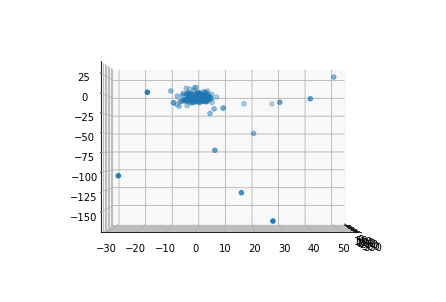

In [38]:
#Exercise 12#################################################

# Answer here
X_reduced1 = PCA(n_components = 3).fit_transform(X_counts.toarray())

import numpy as np
col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced1[X['category_name'] == category].T[0]
    ys = X_reduced1[X['category_name'] == category].T[1]
    zs = X_reduced1[X['category_name'] == category].T[2]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs, ys, zs)
ax.view_init(0,0)
plt.show()

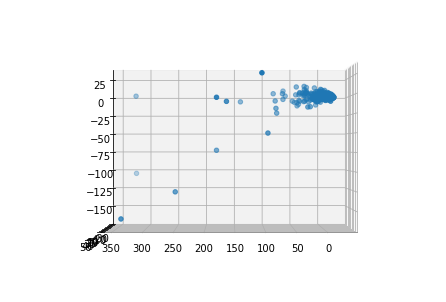

In [39]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs, ys, zs)
ax.view_init(0, 90)
plt.show()

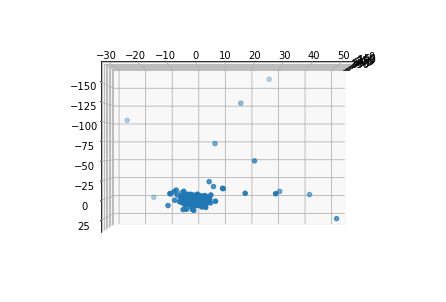

In [40]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs, ys, zs)
ax.view_init(180, 0)
plt.show()

In [41]:
##Exercise 12 end#################################################

In [42]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [43]:
#Exercise 13#################################################

# Answer here

import plotly as py
import plotly.express as px
import plotly.graph_objects as go

x=[]
for n in range(0,500):
    x.append('term_'+count_vect.get_feature_names()[n])

bardata = pd.DataFrame(x,columns=["feature"])
bardata["frequ"]=term_frequencies[:500]


fig = px.bar(bardata, x='feature', y='frequ', color='frequ')
fig.show()

In [44]:
##Exercise 13 end#################################################

In [45]:
#Exercise 14#################################################

# Answer here

bardata_reduces=bardata[bardata.frequ >= 20]
fig = px.bar(bardata_reduces, x='feature', y='frequ', color='frequ')
fig.show()

In [46]:
##Exercise 14 end#################################################

In [47]:
#Exercise 15#################################################

# Answer here

bardatast=bardata.sort_values(by=['frequ'],ascending=False)

fig = px.bar(bardatast, x='feature', y='frequ', color='frequ')
fig.show()

In [48]:
##Exercise 15 end#################################################

In [49]:
#Exercise 16#################################################

# Answer here

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

mlb.classes_

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

In [50]:
##Exercise 16 end#################################################

In [51]:
#takehome exercise finish

In [52]:
#takehome exercise finish

In [53]:
### New Dataset
### Data and Data preparation

In [54]:
#firstdocument####

lines1=[]
with open("imdb_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines1.append(line)
        
l=len(lines1)
texts1=[]
for n in range(0,l):
    texts1.append(lines1[n].split('  \t'))

sentences1=[]
scores1=[]
for sentence, score in texts1:
    sentences1.append(sentence)
    scores1.append(int(score))

print('imdb_read_ok')

#seconddocument####

lines2=[]
with open("amazon_cells_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines2.append(line)

l=len(lines2)
texts2=[]
for n in range(0,l):
    texts2.append(lines2[n].split('\t'))

sentences2=[]
scores2=[]
for sentence, score in texts2:
    sentences2.append(sentence)
    scores2.append(int(score))

print('amazon_read_ok')

#thirddocument####

lines3=[]
with open("yelp_labelled.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一個元素的換行符
        lines3.append(line)

l=len(lines3)
texts3=[]
for n in range(0,l):
    texts3.append(lines3[n].split('\t'))

sentences3=[]
scores3=[]

for sentence, score in texts3:
    sentences3.append(sentence)
    scores3.append(int(score))

print('yelp_read_ok')


import numpy as np

sentences=np.hstack((sentences1,sentences2,sentences3))

scores=np.hstack((scores1,scores2,scores3))

resources1=np.ones(1000,int)
resources2=2*resources1
resources3=3*resources1


resources=np.hstack((resources1,resources2,resources3))


imdb_read_ok
amazon_read_ok
yelp_read_ok


In [55]:
### Data Transformation

In [56]:
#construct dataframe

import pandas as pd

X = pd.DataFrame(sentences,columns=["sentences"])


In [57]:
#adding columns

X["scores"]=scores


In [58]:
X["resources"]=resources

In [59]:
#query

X.query("scores==0 and resources==1")[0:20]

sentences  scores  resources
0   A very, very, very slow-moving, aimless movie ...       0          1
1   Not sure who was more lost - the flat characte...       0          1
2   Attempting artiness with black & white and cle...       0          1
3          Very little music or anything to speak of.       0          1
5   The rest of the movie lacks art, charm, meanin...       0          1
6                                   Wasted two hours.       0          1
8                                  A bit predictable.       0          1
15  It had some average acting from the main perso...       0          1
25        This short film certainly pulls no punches.       0          1
26    Graphics is far from the best part of the game.       0          1
34                       Today the graphics are crap.       0          1
39       This was a flick doomed from its conception.       0          1
40  The very idea of it was lame - take a minor ch...       0          1
41                 I wasn't the least bit interested.       0          1
42  Not only did it only confirm that the film wou...       0          1
43                           But it's just not funny.       0          1
44     But even the talented Carrell can't save this.       0          1
45  His co-stars don't fare much better, with peop...       0          1
46     The story itself is just predictable and lazy.       0          1
47  The only real effects work is the presence of ...       0          1

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
X.scores.value_counts()

1    1500
0    1500
Name: scores, dtype: int64

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
sentences    3000 non-null object
scores       3000 non-null int64
resources    3000 non-null int64
dtypes: int64(2), object(1)
memory usage: 70.4+ KB


In [63]:
X["phrase_len"]= [len(t) for t in X.sentences]
X[0:4]

sentences  scores  resources  \
0  A very, very, very slow-moving, aimless movie ...       0          1   
1  Not sure who was more lost - the flat characte...       0          1   
2  Attempting artiness with black & white and cle...       0          1   
3         Very little music or anything to speak of.       0          1   

   phrase_len  
0          85  
1          97  
2         186  
3          42

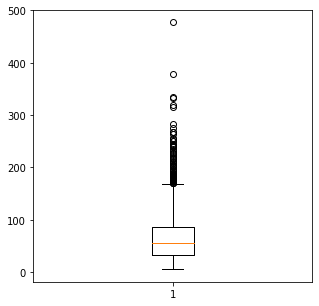

In [64]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(X.phrase_len)
plt.show()

In [65]:
X[X.phrase_len > 150].head()

sentences  scores  resources  \
2   Attempting artiness with black & white and cle...       0          1   
17  I'll put this gem up against any movie in term...       1          1   
40  The very idea of it was lame - take a minor ch...       0          1   
42  Not only did it only confirm that the film wou...       0          1   
47  The only real effects work is the presence of ...       0          1   

    phrase_len  
2          186  
17         159  
40         164  
42         217  
47         184

In [66]:
import helpers.data_mining_helpers as dmh
from nltk.stem import WordNetLemmatizer

dealed=[]
for text in X.sentences:
    ln = dmh.lowercase_nopunc(text)
    tokens = dmh.tokenize_text(ln)
    sm = dmh.stop_remove(tokens)
    lemmatizer=WordNetLemmatizer()
    lemmaed = dmh.lemma_tokens(sm, lemmatizer)
    dealed.append(" ".join(lemmaed))
X["sentencesdealed"]=dealed


In [67]:
X[0:10]

sentences  scores  resources  \
0  A very, very, very slow-moving, aimless movie ...       0          1   
1  Not sure who was more lost - the flat characte...       0          1   
2  Attempting artiness with black & white and cle...       0          1   
3         Very little music or anything to speak of.       0          1   
4  The best scene in the movie was when Gerardo i...       1          1   
5  The rest of the movie lacks art, charm, meanin...       0          1   
6                                  Wasted two hours.       0          1   
7  Saw the movie today and thought it was a good ...       1          1   
8                                 A bit predictable.       0          1   
9  Loved the casting of Jimmy Buffet as the scien...       1          1   

   phrase_len                                    sentencesdealed  
0          85  slowmoving aimless movie distressed drifting y...  
1          97  sure lost flat character audience nearly half ...  
2         186  attempting artiness black white clever camera ...  
3          42                        little music anything speak  
4         106  best scene movie gerardo trying find song keep...  
5         112  rest movie lack art charm meaning emptiness wo...  
6          17                                    wasted two hour  
7          77  saw movie today thought good effort good messa...  
8          18                                    bit predictable  
9          57         loved casting jimmy buffet science teacher

In [68]:
neg_phrases = X[X.scores == 0]
neg_words = []
for t in neg_phrases.sentences:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')

In [69]:
pos_phrases = X[X.scores == 1]
pos_words = []
for t in pos_phrases.sentences:
    pos_words.append(t)
pos_text = pd.Series(pos_words).str.cat(sep=' ')

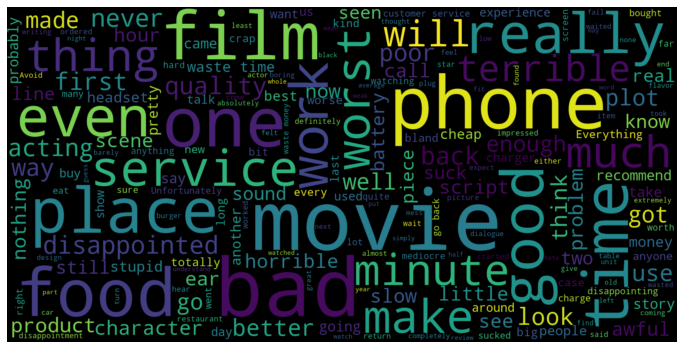

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

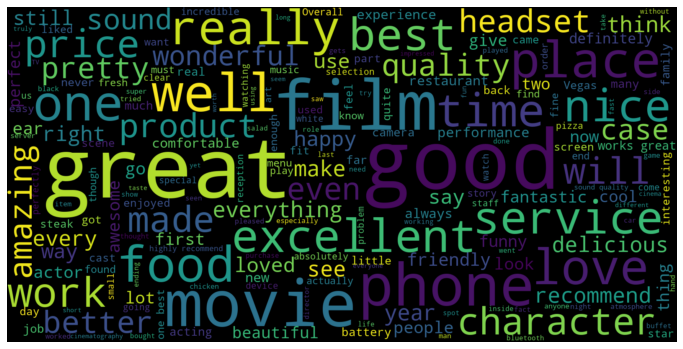

In [71]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit_transform(X.sentences)

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [73]:
neg_matrix = count_vect.transform(X[X.scores == 0].sentences)
pos_matrix = count_vect.transform(X[X.scores == 1].sentences)

In [74]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

negative
Terms          
the         957
and         464
it          407
to          363
is          337

In [75]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

positive
Terms          
the         996
and         674
is          417
it          382
this        328

In [76]:
term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)
term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




negative  positive  total
the         957       996   1953
and         464       674   1138
it          407       382    789
is          337       417    754
to          363       307    670
this        315       328    643
of          314       310    624
was         314       257    571
in          194       206    400
for         177       159    336
that        183       133    316
not         250        56    306
with        116       158    274
my          128       126    254
very         98       147    245
good         53       177    230
you         116       106    222
on          112       109    221
great         9       201    210
but         114        87    201

Text(0.5, 1.0, 'Top 500 phrases')

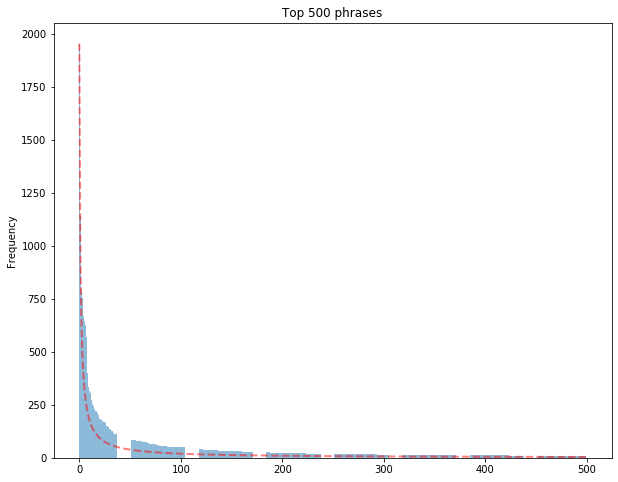

In [77]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases')

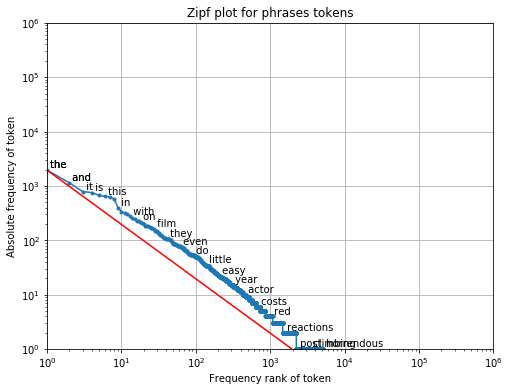

In [78]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [79]:
count_vect1 = CountVectorizer()
count_vect1.fit_transform(X.sentencesdealed)

<3000x4841 sparse matrix of type '<class 'numpy.int64'>'
	with 18097 stored elements in Compressed Sparse Row format>

In [80]:
neg_matrix = count_vect1.transform(X[X.scores == 0].sentencesdealed)
pos_matrix = count_vect1.transform(X[X.scores == 1].sentencesdealed)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in count_vect1.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf_df = neg_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in count_vect1.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['positive'] 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Text(0.5, 1.0, 'Top 50 tokens in negative')

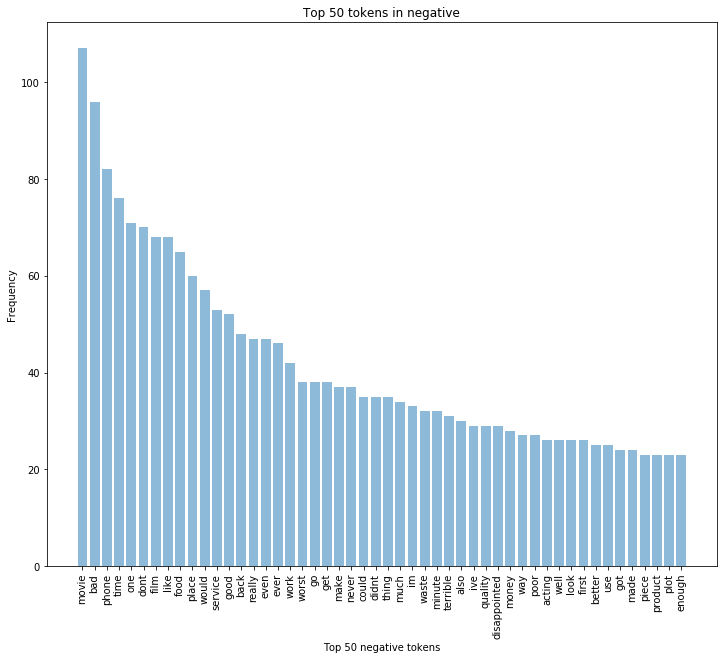

In [81]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative')

Text(0.5, 1.0, 'Top 50 tokens in positive')

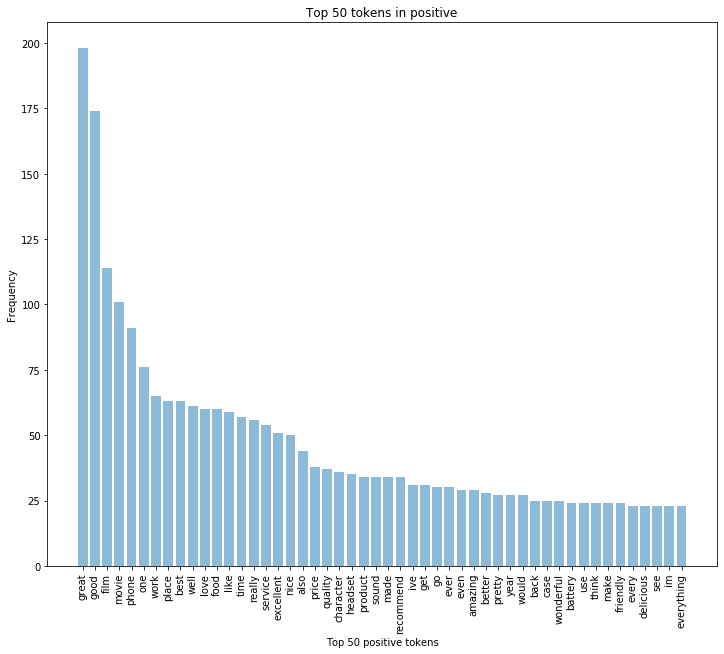

In [82]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive')

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.metrics import roc_auc_score

count_vect = CountVectorizer()
XV = count_vect.fit_transform(X.sentencesdealed)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(XV)

word=count_vect.get_feature_names()
weight=tfidf.toarray()


In [84]:
Xtfidf = pd.DataFrame(word,columns=["word"])

In [85]:
for n in range(0,3000):
    Xtfidf["sentences"+str(n)]=weight[n]

In [86]:
Xtfidf[-50:-10]

word  sentences0  sentences1  sentences2  sentences3  \
4791        wouldbe    0.000000         0.0         0.0         0.0   
4792        wouldnt    0.000000         0.0         0.0         0.0   
4793        wouldve    0.000000         0.0         0.0         0.0   
4794          wound    0.000000         0.0         0.0         0.0   
4795          woven    0.000000         0.0         0.0         0.0   
4796            wow    0.000000         0.0         0.0         0.0   
4797           wrap    0.000000         0.0         0.0         0.0   
4798        wrapped    0.000000         0.0         0.0         0.0   
4799          write    0.000000         0.0         0.0         0.0   
4800         writer    0.000000         0.0         0.0         0.0   
4801        writing    0.000000         0.0         0.0         0.0   
4802        written    0.000000         0.0         0.0         0.0   
4803          wrong    0.000000         0.0         0.0         0.0   
4804     wrongfirst    0.000000         0.0         0.0         0.0   
4805  wrotedirected    0.000000         0.0         0.0         0.0   
4806          yaall    0.000000         0.0         0.0         0.0   
4807           yama    0.000000         0.0         0.0         0.0   
4808        yardley    0.000000         0.0         0.0         0.0   
4809           yawn    0.000000         0.0         0.0         0.0   
4810            yay    0.000000         0.0         0.0         0.0   
4811           yeah    0.000000         0.0         0.0         0.0   
4812           year    0.000000         0.0         0.0         0.0   
4813     yearsgreat    0.000000         0.0         0.0         0.0   
4814           yell    0.000000         0.0         0.0         0.0   
4815         yellow    0.000000         0.0         0.0         0.0   
4816     yellowtail    0.000000         0.0         0.0         0.0   
4817           yelp    0.000000         0.0         0.0         0.0   
4818        yelpers    0.000000         0.0         0.0         0.0   
4819            yes    0.000000         0.0         0.0         0.0   
4820            yet    0.000000         0.0         0.0         0.0   
4821           youd    0.000000         0.0         0.0         0.0   
4822          youdo    0.000000         0.0         0.0         0.0   
4823          youll    0.000000         0.0         0.0         0.0   
4824          young    0.376616         0.0         0.0         0.0   
4825        younger    0.000000         0.0         0.0         0.0   
4826          youre    0.000000         0.0         0.0         0.0   
4827       youthful    0.000000         0.0         0.0         0.0   
4828        youtube    0.000000         0.0         0.0         0.0   
4829          youve    0.000000         0.0         0.0         0.0   
4830          yucky    0.000000         0.0         0.0         0.0   

      sentences4  sentences5  sentences6  sentences7  sentences8  ...  \
4791         0.0         0.0         0.0         0.0         0.0  ...   
4792         0.0         0.0         0.0         0.0         0.0  ...   
4793         0.0         0.0         0.0         0.0         0.0  ...   
4794         0.0         0.0         0.0         0.0         0.0  ...   
4795         0.0         0.0         0.0         0.0         0.0  ...   
4796         0.0         0.0         0.0         0.0         0.0  ...   
4797         0.0         0.0         0.0         0.0         0.0  ...   
4798         0.0         0.0         0.0         0.0         0.0  ...   
4799         0.0         0.0         0.0         0.0         0.0  ...   
4800         0.0         0.0         0.0         0.0         0.0  ...   
4801         0.0         0.0         0.0         0.0         0.0  ...   
4802         0.0         0.0         0.0         0.0         0.0  ...   
4803         0.0         0.0         0.0         0.0         0.0  ...   
4804         0.0         0.0         0.0         0.0         0.0  ...   
4805    

In [87]:
pos=pos_words_tf["Terms"].to_numpy()
neg=neg_tf["Terms"].to_numpy()

pos_tag=[]
neg_tag=[]

for i in pos:
    pos_tag.append([i,1])
for i in neg:
    neg_tag.append([i,0])
    
pos= pd.DataFrame(pos_tag,columns=['txt','status'])
neg= pd.DataFrame(neg_tag,columns=['txt','status'])

In [88]:
pos

txt  status
0         great       1
1          good       1
2          film       1
3         movie       1
4         phone       1
...         ...     ...
4836   appetite       1
4837  instantly       1
4838      ninja       1
4839     poured       1
4840      wound       1

[4841 rows x 2 columns]

In [89]:
neg

txt  status
0        movie       0
1          bad       0
2        phone       0
3         time       0
4          one       0
...        ...     ...
4836      sals       0
4837       fav       0
4838    caring       0
4839  teamwork       0
4840    degree       0

[4841 rows x 2 columns]

In [90]:
data= pd.concat([pos,neg],axis=0)         

In [91]:
data['status'].value_counts()

1    4841
0    4841
Name: status, dtype: int64

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

vectorizer= tfid()   
x= vectorizer.fit_transform(X.sentencesdealed)
y= X.scores

In [93]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state= 42) 

In [94]:
from sklearn.naive_bayes import MultinomialNB       
tfidfclf= MultinomialNB()

tfidfclf.fit(x_train,y_train)
pred= tfidfclf.predict(x_test)
print(roc_auc_score(pred,y_test))

0.7926785714285715


In [95]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.788

In [96]:
count_vect = CountVectorizer()
x=count_vect.fit_transform(X.sentencesdealed)
y= X.scores

In [97]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state= 42) 

In [98]:
from sklearn.naive_bayes import MultinomialNB       
wfclf= MultinomialNB()

wfclf.fit(x_train,y_train)
pred= wfclf.predict(x_test)
print(roc_auc_score(pred,y_test))

0.7937969616314997


In [99]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.7826666666666666

In [ ]:
#